1)A)

Using an Artificial Neural Network,I predicted the flight price with 82 percent R Square value.

In [3]:
#Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from keras.regularizers import l2
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
%matplotlib inline

In [4]:
df=pd.read_excel('/content/drive/MyDrive/Projects/Airline_Price_Prediction_Neural_Network/Data (3).xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


1)B)

In [5]:
print('Column name\tMissing Value Count\tMissing Value %')
for i in df.columns:
  print(i,'\t',df[i].isnull().sum(),'\t',(df[i].isnull().sum()/len(df))*100)
#Route and Total Stops columns have only 1 missing value

Column name	Missing Value Count	Missing Value %
Airline 	 0 	 0.0
Date_of_Journey 	 0 	 0.0
Source 	 0 	 0.0
Destination 	 0 	 0.0
Route 	 1 	 0.009361542782250515
Dep_Time 	 0 	 0.0
Arrival_Time 	 0 	 0.0
Duration 	 0 	 0.0
Total_Stops 	 1 	 0.009361542782250515
Additional_Info 	 0 	 0.0
Price 	 0 	 0.0


In [6]:
print(df[df['Route'].isnull()])

        Airline Date_of_Journey Source Destination Route Dep_Time  \
9038  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9038  09:25 07 May  23h 40m         NaN         No info   7480  


In [7]:
print(df[df['Total_Stops'].isnull()])

        Airline Date_of_Journey Source Destination Route Dep_Time  \
9038  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9038  09:25 07 May  23h 40m         NaN         No info   7480  


In [8]:
#Both Route and Total_Stops have null values in the same row.
#So we can drop this
df.dropna(inplace=True)

In [9]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8343
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [10]:
df['Additional_Info']=df['Additional_Info'].replace('No Info','No info')
# df['Additional_Info'].value_counts()

In [11]:
df['Source'].value_counts()

,count
Source,
Delhi,4536
Kolkata,2871
Banglore,2197
Mumbai,696
Chennai,381


In [12]:
df['Destination'].value_counts()

,count
Destination,
Cochin,4536
Banglore,2871
Delhi,1265
New Delhi,932
Hyderabad,696
Kolkata,381


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Date_of_Journey  10681 non-null  object
 2   Source           10681 non-null  object
 3   Destination      10681 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10681 non-null  object
 6   Arrival_Time     10681 non-null  object
 7   Duration         10681 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10681 non-null  object
 10  Price            10681 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.3+ KB


In [14]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Journey_Date']=df['Date_of_Journey'].dt.day
df['Journey_Day']=df['Date_of_Journey'].dt.dayofweek
df['Journey_Month']=df['Date_of_Journey'].dt.month
df['Journey_Year']=df['Date_of_Journey'].dt.year

<ipython-input-14-e48efb45dac5>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])


In [15]:
df['Journey_Day']

,Journey_Day
0,6
1,2
2,6
3,6
4,4
...,...
10677,1
10678,5
10679,5
10680,4


In [16]:
df=df.drop(['Date_of_Journey'],axis=1)
df['Journey_Date']=df['Journey_Date'].astype('int')
df['Journey_Day']=df['Journey_Day'].astype('int')
df['Journey_Month']=df['Journey_Month'].astype('int')
df['Journey_Year']=df['Journey_Year'].astype('int')

In [17]:
print(df['Journey_Year'].value_counts())
df=df.drop(['Journey_Year'],axis=1)
#Dropping as it only has one value throughout the column

Journey_Year
2019    10681
Name: count, dtype: int64


In [18]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Dep_Hour']=df['Dep_Time'].dt.hour
df=df.drop(['Dep_Time'],axis=1)
print(df['Dep_Hour'])

0        22
1         5
2         9
3        18
4        16
         ..
10677    19
10678    20
10679     8
10680    11
10681    10
Name: Dep_Hour, Length: 10681, dtype: int32


<ipython-input-18-e1916f845e33>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Time']=pd.to_datetime(df['Dep_Time'])


In [19]:
df['Arrival_Time'].value_counts()

,count
Arrival_Time,
19:00,423
21:00,360
19:15,333
16:10,154
12:35,122
...,...
00:25 02 Jun,1
08:55 13 Mar,1
11:05 19 May,1


In [20]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])
df['Arrival_Hour']=df['Arrival_Time'].dt.hour
df=df.drop(['Arrival_Time'],axis=1)
print(df['Arrival_Hour'])

<ipython-input-20-98339c4edd75>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])


0         1
1        13
2         4
3        23
4        21
         ..
10677    22
10678    23
10679    11
10680    14
10681    19
Name: Arrival_Hour, Length: 10681, dtype: int32


In [21]:
df['Total_Stops'].value_counts()

,count
Total_Stops,
1 stop,5624
non-stop,3491
2 stops,1520
3 stops,45
4 stops,1


In [22]:
df['Total_Stops']=df['Total_Stops'].replace('non-stop',0)
df['Total_Stops']=df['Total_Stops'].replace('1 stop',1)
df['Total_Stops']=df['Total_Stops'].replace('2 stops',2)
df['Total_Stops']=df['Total_Stops'].replace('3 stops',3)
df['Total_Stops']=df['Total_Stops'].replace('4 stops',4)
df['Total_Stops']=df['Total_Stops'].astype('int')

In [23]:
df['Duration_hours']=df['Duration'].apply(lambda x:x.split('h')[0])
df[df['Duration_hours']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Day,Journey_Month,Dep_Hour,Arrival_Hour,Duration_hours
6473,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2,No info,17327,6,2,3,16,16,5m


In [24]:
#Duration is 5 minutes which is incorrect data so dropping this row
df=df.drop(index=[6473],axis=0)

In [25]:
df['Duration_hours']=df['Duration_hours'].astype('int')
df['Duration_minutes']=df['Duration'].apply(lambda x:x.split('h')[1].strip().split('m')[0])
print(df['Duration_minutes'].unique())

['50' '25' '' '45' '30' '5' '15' '35' '10' '20' '55' '40']


In [26]:
df[df['Duration_minutes']=='']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Day,Journey_Month,Dep_Hour,Arrival_Hour,Duration_hours,Duration_minutes
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,6,9,4,19,
18,Air India,Delhi,Cochin,DEL → CCU → BOM → COK,23h,2,No info,13381,12,2,6,20,19,23,
33,Jet Airways,Delhi,Cochin,DEL → NAG → BOM → COK,22h,2,In-flight meal not included,10919,15,5,6,14,12,22,
44,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,12h,1,No info,13062,21,3,3,9,21,12,
53,IndiGo,Banglore,Delhi,BLR → DEL,3h,0,No info,3943,18,1,6,21,0,3,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10590,Jet Airways,Delhi,Cochin,DEL → ATQ → BOM → COK,23h,2,No info,14300,12,2,6,20,19,23,
10637,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,14h,1,In-flight meal not included,7832,21,3,3,21,11,14,
10638,Air India,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,38h,3,No info,10493,3,0,6,5,19,38,
10672,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,15h,2,No info,16704,27,0,5,13,4,15,


In [27]:
#Replacing blank string in Duration_minutes with 0
df['Duration_minutes']=df['Duration_minutes'].replace('',0)
df['Duration_minutes']=df['Duration_minutes'].astype('int')

In [28]:
df['Duration_minutes']=df['Duration_minutes']+60*df['Duration_hours']

In [29]:
print(df['Duration_minutes'])
df=df.drop(['Duration','Duration_hours'],axis=1)

0         170
1         445
2        1140
3         325
4         285
         ... 
10677     150
10678     155
10679     180
10680     160
10681     500
Name: Duration_minutes, Length: 10680, dtype: int64


In [30]:
df=df.drop(['Route'],axis=1)

In [31]:
df_numeric=df.select_dtypes(include=['int64','float64'])

1)C)

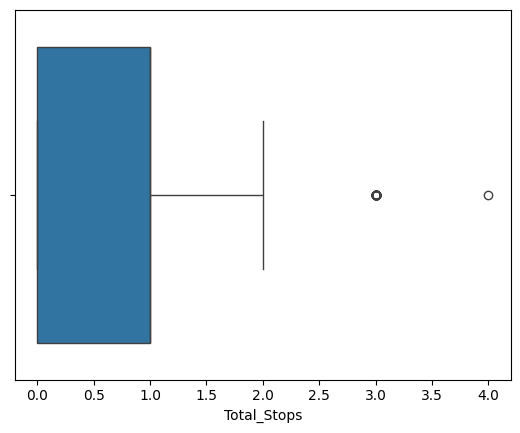

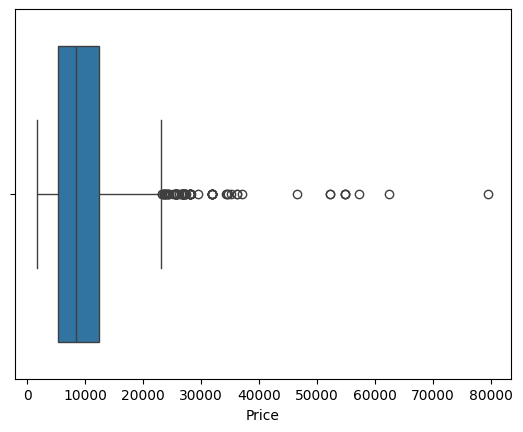

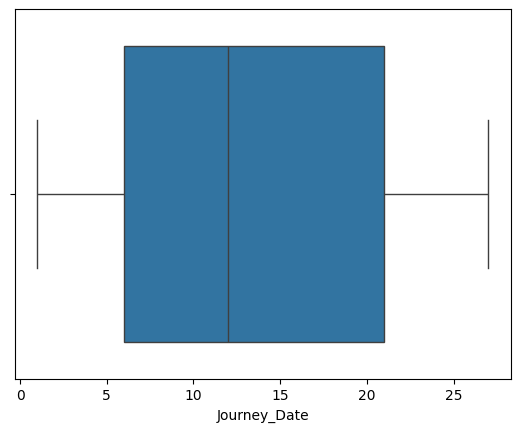

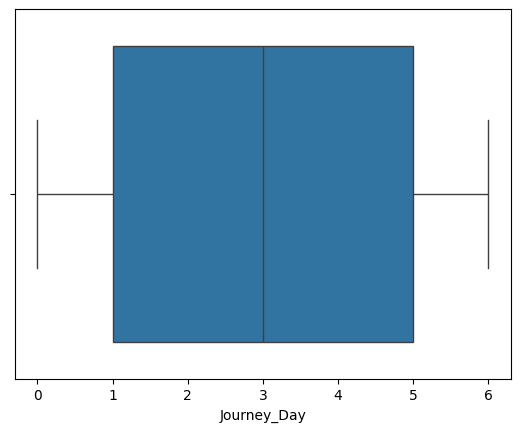

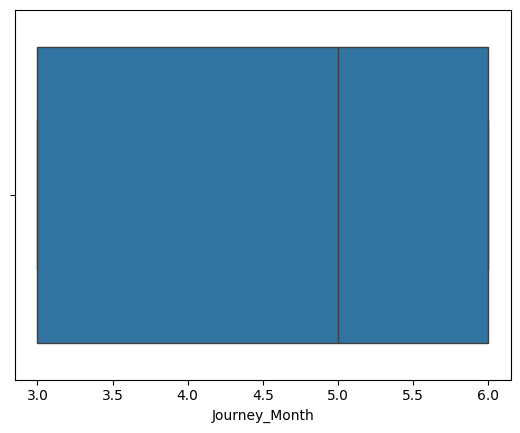

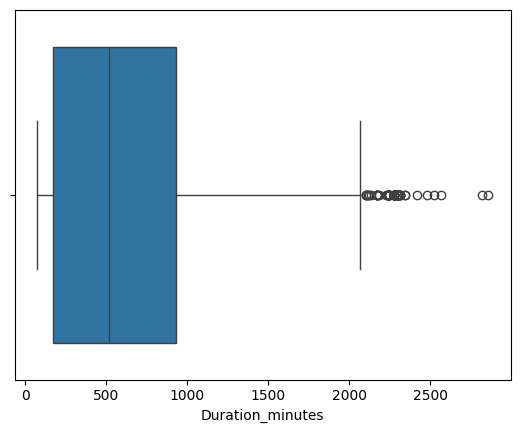

In [32]:
def visualize_boxplot(column):
  sns.boxplot(data=df_numeric,x=df_numeric[column])
  plt.show()
for i in df_numeric.columns:
  visualize_boxplot(i)

In [33]:
df=pd.get_dummies(df,columns=['Airline','Source','Destination','Additional_Info'],drop_first=True)

In [34]:
df=df.drop(['Additional_Info_1 Short layover','Additional_Info_Red-eye flight','Additional_Info_2 Long layover','Additional_Info_No info','Arrival_Hour'],axis=1)
#Dropping these columns as they only have one instance in the column

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10680 entries, 0 to 10681
Data columns (total 30 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Total_Stops                                   10680 non-null  int64
 1   Price                                         10680 non-null  int64
 2   Journey_Date                                  10680 non-null  int64
 3   Journey_Day                                   10680 non-null  int64
 4   Journey_Month                                 10680 non-null  int64
 5   Dep_Hour                                      10680 non-null  int32
 6   Duration_minutes                              10680 non-null  int64
 7   Airline_Air India                             10680 non-null  bool 
 8   Airline_GoAir                                 10680 non-null  bool 
 9   Airline_IndiGo                                10680 non-null  bool 
 10  Airline_Jet Air

Deciding whether you need a fully connected neural network (FCNN) depends on the problem you're trying to solve and the characteristics of your data. Here are some factors to consider:

### 1. **Nature of the Data:**
   - **Structured Data**: If your data is structured, like tabular data, an FCNN might be suitable. FCNNs can model complex relationships between features in structured data.
   - **Unstructured Data**: If you're working with unstructured data like images, text, or audio, FCNNs may not be the best choice. Convolutional Neural Networks (CNNs) are often better for images, while Recurrent Neural Networks (RNNs) or Transformers are better for sequences (like text or time series).

### 2. **Feature Independence:**
   - **Independent Features**: If the features in your data are independent, an FCNN might be appropriate since it treats each feature equally.
   - **Local Dependencies**: If there are local dependencies or hierarchical patterns in your data (e.g., pixels in an image, words in a sentence), a model like CNNs or RNNs that can exploit these patterns might be better.

### 3. **Complexity of the Problem:**
   - **Simple Relationships**: For problems where the relationships between inputs and outputs are relatively simple, FCNNs can work well.
   - **Complex Relationships**: For problems requiring understanding of spatial, temporal, or other complex patterns, specialized architectures (like CNNs for spatial data or RNNs for sequential data) might perform better.

### 4. **Computational Resources:**
   - **Resource Constraints**: FCNNs can become computationally expensive with large input sizes, as they require a lot of parameters. If computational resources are limited, and the input size is large, consider other architectures that might reduce the parameter count (e.g., CNNs for images).

### 5. **Interpretability:**
   - **Need for Interpretability**: If interpretability is important, simpler models like logistic regression, decision trees, or even smaller FCNNs might be preferable.

### 6. **Domain Expertise:**
   - **Incorporating Domain Knowledge**: Sometimes, domain knowledge suggests a particular structure for the model. For instance, in image recognition, the spatial structure of images naturally leads to the use of CNNs.

### 7. **Experimentation:**
   - **Empirical Performance**: Often, the best approach is to experiment with different model types and see which one performs best on your validation data. This could mean starting with simpler models like FCNNs and moving to more complex architectures if needed.

### When to Use FCNN:
- When your data is structured and doesn't have inherent spatial or temporal dependencies.
- When you need a general-purpose model that can handle various types of data without relying on specific assumptions about the data structure.
- When your problem is relatively simple, and you want a straightforward architecture.

### When Not to Use FCNN:
- When dealing with images, use CNNs instead, as they can exploit the spatial hierarchy in the data.
- When dealing with sequential data (e.g., time series, text), consider RNNs, LSTMs, GRUs, or Transformers.
- When your data has complex structures that specific architectures can model more effectively.

In summary, the decision to use an FCNN or not depends largely on the data's structure, the complexity of the task, and the availability of computational resources.

Deciding on the number of hidden layers and the number of neurons in each layer for a neural network is more of an art than a science, often requiring experimentation. However, there are some guidelines and considerations that can help you make informed decisions.

### 1. **Complexity of the Problem:**
   - **Simple Problems:** If the problem is relatively simple (e.g., linear or low-dimensional), a neural network with one hidden layer might suffice. In fact, a single hidden layer with enough neurons can approximate any continuous function (this is known as the Universal Approximation Theorem).
   - **Complex Problems:** More complex problems, especially those involving highly non-linear functions or high-dimensional data, may require multiple hidden layers to capture intricate patterns and features.

### 2. **Type of Data:**
   - **Structured Data:** For structured data (e.g., tabular data), a few hidden layers with a moderate number of neurons might be sufficient.
   - **Unstructured Data:** For unstructured data like images, text, or audio, deeper networks (more hidden layers) are typically required. For example, deep Convolutional Neural Networks (CNNs) might have dozens of layers for image recognition tasks.

### 3. **Dimensionality of Input Data:**
   - **Low-Dimensional Data:** If your input data has a low number of features, you might not need many neurons in the hidden layers.
   - **High-Dimensional Data:** For high-dimensional data, you might need more neurons in each layer to adequately capture the complexity of the input space.

### 4. **Overfitting and Underfitting:**
   - **Overfitting:** Using too many neurons or layers can lead to overfitting, where the model performs well on training data but poorly on unseen data. Regularization techniques like dropout, L2 regularization, or reducing the number of neurons/layers can help mitigate this.
   - **Underfitting:** Conversely, using too few neurons or layers can lead to underfitting, where the model is too simple to capture the underlying patterns in the data.

### 5. **Computational Resources:**
   - **Resource Constraints:** Deeper networks with more neurons require more computational resources and longer training times. If resources are limited, you might need to balance network complexity with available resources.
   - **Efficiency Considerations:** Start with a smaller network and gradually increase the complexity as needed. This approach allows you to find a good balance between performance and efficiency.

### 6. **Domain Knowledge:**
   - **Incorporating Insights:** If you have domain knowledge about the problem, use it to inform the network architecture. For example, in image processing, you might start with a smaller number of neurons in the initial layers and increase them in deeper layers to capture more abstract features.

### 7. **Experimentation and Tuning:**
   - **Grid Search and Random Search:** Experiment with different numbers of layers and neurons using grid search, random search, or even more sophisticated techniques like Bayesian optimization.
   - **Early Stopping:** Use early stopping to prevent overfitting and to find the optimal number of neurons and layers.
   - **Cross-Validation:** Use cross-validation to assess the generalization ability of different architectures and choose the one that performs best on validation data.

### 8. **Heuristics and Rules of Thumb:**
   - **Starting Point:** Start with one or two hidden layers and a number of neurons somewhere between the size of the input layer and the size of the output layer.
   - **Neurons per Layer:** A common heuristic is to start with a number of neurons equal to the average of the input and output layer sizes, and adjust from there.
   - **Incremental Complexity:** Add more layers or increase the number of neurons if the model is underfitting (not learning enough), and reduce complexity if the model is overfitting.

### 9. **Examples of Common Architectures:**
   - **Shallow Networks:** For straightforward tasks, a network with one hidden layer and 10-100 neurons might suffice.
   - **Deep Networks:** For more complex tasks, especially in deep learning applications like image recognition or NLP, networks can have dozens or even hundreds of layers with varying numbers of neurons.

### Summary:
- **Start Simple:** Begin with one or two hidden layers and a moderate number of neurons.
- **Experiment and Validate:** Gradually increase complexity based on validation performance and use regularization to prevent overfitting.
- **Domain Knowledge:** Leverage domain knowledge and data characteristics to guide your decisions.
- **Monitor Performance:** Continuously monitor the model's performance to adjust the architecture as needed.

In [36]:
X=df.copy()
X=X.drop('Price',axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10680 entries, 0 to 10681
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Total_Stops                                   10680 non-null  int64
 1   Journey_Date                                  10680 non-null  int64
 2   Journey_Day                                   10680 non-null  int64
 3   Journey_Month                                 10680 non-null  int64
 4   Dep_Hour                                      10680 non-null  int32
 5   Duration_minutes                              10680 non-null  int64
 6   Airline_Air India                             10680 non-null  bool 
 7   Airline_GoAir                                 10680 non-null  bool 
 8   Airline_IndiGo                                10680 non-null  bool 
 9   Airline_Jet Airways                           10680 non-null  bool 
 10  Airline_Jet Air

In [37]:
y=df['Price']

In [38]:
'''
What is Cross-Validation?
Cross-validation is a technique used to assess the performance and generalizability of a machine learning model. It involves partitioning the dataset into multiple subsets and training the model on some subsets while validating it on the others. This process helps in identifying how well the model performs on unseen data, reducing the likelihood of overfitting.

Types of Cross-Validation:
K-Fold Cross-Validation: The dataset is split into k equally sized "folds." The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, each time with a different fold used as the test set. The final performance metric is the average of the metrics from the k iterations.

Stratified K-Fold Cross-Validation: Similar to K-Fold, but it ensures that each fold has the same proportion of classes, which is especially useful for imbalanced datasets.

Leave-One-Out Cross-Validation (LOOCV): Each observation in the dataset is treated as a test set while the remaining observations are used as the training set. This is a special case of K-Fold where k is equal to the number of data points.

Time Series Cross-Validation: Used for time series data where the order of data is important. The training set is expanded in each iteration while keeping the test set forward in time.

Example: K-Fold Cross-Validation in Python
Let's go through an example of how to perform K-Fold Cross-Validation using Python's scikit-learn library.
'''
'''
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (classes)
# Define the model
model = RandomForestClassifier(random_state=42)
# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Output the scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation of Accuracy:", np.std(scores))
'''
'''
Explanation:
cross_val_score: This function automatically performs the cross-validation process. It fits the model on the training set and evaluates it on the validation set for each fold.
cv=kf: Here, kf is the KFold object, which determines how the data is split.
scoring='accuracy': Specifies that we want to measure the accuracy of the model for each fold.
np.mean(scores): Computes the mean accuracy across all folds.
np.std(scores): Computes the standard deviation of accuracy across all folds, giving an idea of the variance in model performance.
Output:
The output will be a set of accuracy scores, one for each fold, along with the mean and standard deviation of these scores. This information helps in understanding how well the model is likely to perform on unseen data.

Summary:
Cross-validation, particularly K-Fold Cross-Validation, is a powerful technique to evaluate the performance of a machine learning model. It helps in ensuring that the model generalizes well to new data by using multiple train-test splits. Python's scikit-learn library makes it easy to implement and analyze the results of cross-validation.
'''

"\nExplanation:\ncross_val_score: This function automatically performs the cross-validation process. It fits the model on the training set and evaluates it on the validation set for each fold.\ncv=kf: Here, kf is the KFold object, which determines how the data is split.\nscoring='accuracy': Specifies that we want to measure the accuracy of the model for each fold.\nnp.mean(scores): Computes the mean accuracy across all folds.\nnp.std(scores): Computes the standard deviation of accuracy across all folds, giving an idea of the variance in model performance.\nOutput:\nThe output will be a set of accuracy scores, one for each fold, along with the mean and standard deviation of these scores. This information helps in understanding how well the model is likely to perform on unseen data.\n\nSummary:\nCross-validation, particularly K-Fold Cross-Validation, is a powerful technique to evaluate the performance of a machine learning model. It helps in ensuring that the model generalizes well to ne

Your concern is a common misunderstanding about how cross-validation works, but it’s important to clarify why cross-validation does not actually harm generalization.

### Key Points about Cross-Validation and Generalization:

1. **Independent Training for Each Fold**:
   - In cross-validation, each iteration (or fold) is independent. When a specific subset is used for validation, the model is trained **only** on the other subsets. The weights or parameters learned from one fold are not carried over to the next fold. Thus, when a subset that was previously used for training is now used for validation, it is as if the model has never seen that data before.
   - Essentially, the model is re-initialized and retrained from scratch for each fold, so the fact that a subset was used in training during a different fold does not impact its performance when it is used as the validation set.

2. **The Goal of Cross-Validation**:
   - The primary purpose of cross-validation is to assess the model's ability to generalize to unseen data by ensuring that every data point in the dataset has been used both for training and for validation. This process provides a more robust estimate of the model's performance across different subsets of the data.
   - By averaging the performance across all folds, cross-validation provides a more accurate and less biased estimate of the model's generalization ability compared to a single train/test split.

3. **Data Leakage Is Prevented**:
   - Cross-validation is designed to prevent data leakage, which would occur if information from the validation set were inadvertently used during training. Since each fold is trained independently, the model does not have access to the validation data when it's being trained.
   - The model is only evaluated on the validation set after the training process is complete for each fold, meaning it cannot "learn" from the validation data.

### How Cross-Validation Enhances Generalization:

- **Avoids Overfitting to a Single Split**: Using a single train/test split can lead to overfitting, especially if the split is not representative of the entire dataset. Cross-validation mitigates this risk by ensuring that the model is tested on different subsets, giving a more reliable estimate of its performance.
  
- **Utilizes All Data**: In small datasets, cross-validation is particularly beneficial because it allows the model to be trained on almost all available data (across different folds), thus maximizing the use of the dataset while still providing an evaluation on unseen data.

### Example to Illustrate:

Let’s say you have a dataset with 1000 samples and you perform 5-fold cross-validation:
- **Fold 1**: Train on samples 1-800, validate on 801-1000.
- **Fold 2**: Train on samples 201-1000 and 1-200, validate on 201-400.
- **Fold 3**: Train on samples 401-1000 and 1-400, validate on 401-600.
- **Fold 4**: Train on samples 601-1000 and 1-600, validate on 601-800.
- **Fold 5**: Train on samples 801-1000 and 1-800, validate on 1-200.

Each validation fold is unseen to the model during the corresponding training phase. The model is reset between each fold, ensuring that no information from the validation set influences the training process.

### Summary:

Cross-validation is actually beneficial for generalization because it provides a more accurate estimate of a model's performance across different subsets of the data. It ensures that every data point is used both for training and validation, reducing the risk of overfitting and providing a reliable measure of how well the model will perform on truly unseen data.

There seems to be a misunderstanding in the description for Fold 2. Let's go through the correct setup for Fold 2 in a 5-fold cross-validation scenario:

There seems to be a misunderstanding in the description for Fold 2. Let's go through the correct setup for Fold 2 in a 5-fold cross-validation scenario:

### 5-Fold Cross-Validation Setup

1. **Total Number of Data Points**: 1-1000
2. **Number of Folds (`k`)**: 5
3. **Data Points per Fold**: 1000/5 = 200 data points per fold

### Correct Setup for Fold 2

- **Training Data for Fold 2**: The model is trained on all data points **except** those in the validation set for Fold 2.
  - **Training Data**: Data points from 1-200 and 401-1000.
  - **Validation Data**: Data points from 201-400.

### Summary for Fold 2:
- **Training Data Points**: 1-200 and 401-1000 (a total of 800 data points).
- **Validation Data Points**: 201-400 (a total of 200 data points).

### Clarification:
- The training data for Fold 2 consists of **two segments**: the data points before the validation set (1-200) and the data points after the validation set (401-1000).
- The validation data for Fold 2 is the subset of data points from 201-400, which the model does not see during the training phase of Fold 2.

This ensures that the validation data (201-400) is not used during training in Fold 2, maintaining the integrity of the cross-validation process and preventing data leakage.

What is Leave-One-Out Cross-Validation (LOOCV)?
Leave-One-Out Cross-Validation (LOOCV) is a special case of K-Fold Cross-Validation where the number of folds k is equal to the number of data points in the dataset. This means that in each iteration, one data point is used as the validation set, and the remaining n-1 data points are used as the training set. This process is repeated for each data point in the dataset, resulting in n training/validation iterations.


###Advantages of LOOCV:

Maximizes Training Data: Each model is trained on almost all available data (n-1 samples).

No Randomness: Since every data point is used as a validation point exactly once, there is no randomness involved, leading to a deterministic evaluation.



###Disadvantages of LOOCV:
Computationally Expensive: For large datasets, LOOCV can be very computationally expensive because it requires training the model n times.

High Variance: Since each validation set contains only one data point, the performance of the model can vary significantly between iterations, leading to high variance in the validation score.

In [39]:
'''
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.ensemble import RandomForestClassifier
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (classes)
# Define the model
model = RandomForestClassifier(random_state=42)
# Set up Leave-One-Out Cross-Validation
loo = LeaveOneOut()
# Perform LOOCV
scores = cross_val_score(model, X, y, cv=loo, scoring='accuracy')

# Output the results
print("Number of Iterations:", len(scores))
print("Accuracy for each iteration:", scores)
print("Mean Accuracy:", np.mean(scores))
'''
'''
Explanation:
LeaveOneOut(): Creates a cross-validation object that performs LOOCV.
cross_val_score(): This function performs the cross-validation process. It trains the model on n-1 data points and validates on the remaining 1 data point for each iteration.
scoring='accuracy': Specifies that we want to measure the accuracy of the model for each iteration.
np.mean(scores): Computes the mean accuracy across all iterations.
'''

"\nExplanation:\nLeaveOneOut(): Creates a cross-validation object that performs LOOCV.\ncross_val_score(): This function performs the cross-validation process. It trains the model on n-1 data points and validates on the remaining 1 data point for each iteration.\nscoring='accuracy': Specifies that we want to measure the accuracy of the model for each iteration.\nnp.mean(scores): Computes the mean accuracy across all iterations.\n"

What is Time Series Cross-Validation?
Time Series Cross-Validation is a specialized version of cross-validation designed to handle the temporal nature of time series data. In time series data, the order of observations matters, and future values depend on past values. Thus, the typical cross-validation approach that randomly shuffles and splits the data is not suitable, as it can lead to information leakage from future data into the training set.

How Time Series Cross-Validation Works:
Expanding Window (Forward Chaining):

In this approach, the training set grows with each fold, incorporating more data over time. The validation set is always ahead in time, and the training set includes all past data up to that point.
Sliding Window:

In this approach, a fixed-size window slides over the data. The model is trained on data within the window and validated on data just ahead of the window. This method keeps the size of the training data constant, but it might discard valuable historical data.

Overview of Hyperparameter Optimization Methods:
When training machine learning models, selecting the best set of hyperparameters (parameters not learned directly from the training process) is crucial for achieving optimal performance. Various techniques can be used for hyperparameter tuning, including Grid Search, Random Search, Bayesian Optimization, and more advanced methods like Adam Optimization. Let's explore each method with explanations and examples in Python.

1. Grid Search
Grid Search exhaustively searches through a manually specified subset of the hyperparameter space. It tries every possible combination of hyperparameter values provided.

In [40]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X, y)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
'''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.datasets import load_iris\n\n# Load the dataset\niris = load_iris()\nX, y = iris.data, iris.target\n\n# Define the model\nmodel = RandomForestClassifier(random_state=42)\n\n# Define the grid of hyperparameters\nparam_grid = {\n    \'n_estimators\': [10, 50, 100],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_split\': [2, 5, 10]\n}\n\n# Set up GridSearchCV\ngrid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=\'accuracy\')\n\n# Fit the model\ngrid_search.fit(X, y)\n\n# Best parameters and score\nprint("Best parameters:", grid_search.best_params_)\nprint("Best cross-validation score:", grid_search.best_score_)\n'

2. Random Search
Random Search selects random combinations of hyperparameters from a given range. Unlike Grid Search, it doesn't evaluate every possible combination, making it more efficient for large hyperparameter spaces.

In [41]:
'''
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import numpy as np

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the grid of hyperparameters
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=10, stop=200, num=10)],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the model
random_search.fit(X, y)

# Best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)
'''

'\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.datasets import load_iris\nimport numpy as np\n\n# Load the dataset\niris = load_iris()\nX, y = iris.data, iris.target\n\n# Define the model\nmodel = RandomForestClassifier(random_state=42)\n\n# Define the grid of hyperparameters\nparam_dist = {\n    \'n_estimators\': [int(x) for x in np.linspace(start=10, stop=200, num=10)],\n    \'max_depth\': [None, 10, 20, 30, 40, 50],\n    \'min_samples_split\': [2, 5, 10],\n    \'bootstrap\': [True, False]\n}\n\n# Set up RandomizedSearchCV\nrandom_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, scoring=\'accuracy\', random_state=42)\n\n# Fit the model\nrandom_search.fit(X, y)\n\n# Best parameters and score\nprint("Best parameters:", random_search.best_params_)\nprint("Best cross-validation score:", random_search.best_score_)\n'

3. Bayesian Optimization
Bayesian Optimization is an advanced method that builds a probabilistic model (usually a Gaussian process) to estimate the function mapping hyperparameters to the performance metric. It then selects hyperparameters that are likely to improve the model's performance, balancing exploration and exploitation.

Example in Python with scikit-optimize:

In [42]:
'''
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameter space
param_space = {
    'n_estimators': (10, 200),
    'max_depth': (1, 50),
    'min_samples_split': (2, 20)
}

# Set up BayesSearchCV
bayes_search = BayesSearchCV(estimator=model, search_spaces=param_space, n_iter=32, cv=5, scoring='accuracy', random_state=42)

# Fit the model
bayes_search.fit(X, y)

# Best parameters and score
print("Best parameters:", bayes_search.best_params_)
print("Best cross-validation score:", bayes_search.best_score_)

'''

'\nfrom skopt import BayesSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.datasets import load_iris\n\n# Load the dataset\niris = load_iris()\nX, y = iris.data, iris.target\n\n# Define the model\nmodel = RandomForestClassifier(random_state=42)\n\n# Define the hyperparameter space\nparam_space = {\n    \'n_estimators\': (10, 200),\n    \'max_depth\': (1, 50),\n    \'min_samples_split\': (2, 20)\n}\n\n# Set up BayesSearchCV\nbayes_search = BayesSearchCV(estimator=model, search_spaces=param_space, n_iter=32, cv=5, scoring=\'accuracy\', random_state=42)\n\n# Fit the model\nbayes_search.fit(X, y)\n\n# Best parameters and score\nprint("Best parameters:", bayes_search.best_params_)\nprint("Best cross-validation score:", bayes_search.best_score_)\n\n'

4. Adam Optimization
Adam Optimization is an optimization algorithm often used for training deep learning models, especially in neural networks. It combines the advantages of the Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp). Adam is used in the training process to update network weights iteratively, aiming to minimize the loss function.



In [43]:
'''
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Generate synthetic data
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, 1000)

# Define the model
model = Sequential([
    Dense(64, input_dim=10, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

'''

"\nimport tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\nfrom tensorflow.keras.optimizers import Adam\n\n# Generate synthetic data\nX = np.random.rand(1000, 10)\ny = np.random.randint(0, 2, 1000)\n\n# Define the model\nmodel = Sequential([\n    Dense(64, input_dim=10, activation='relu'),\n    Dense(32, activation='relu'),\n    Dense(1, activation='sigmoid')\n])\n\n# Compile the model with Adam optimizer\nmodel.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])\n\n# Train the model\nmodel.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)\n\n"

1. n_iter (Number of Iterations)
Purpose: The n_iter parameter defines the number of iterations the search algorithm will perform. In the context of RandomizedSearchCV or BayesSearchCV, it specifies how many different sets of hyperparameters will be sampled and evaluated.

Why it’s Important:

In RandomizedSearchCV: Since the search is random, specifying n_iter allows you to control how many random combinations will be tried. More iterations increase the chances of finding a good set of hyperparameters but also increase computational cost.
In BayesSearchCV: Bayesian Optimization is more efficient, but n_iter still controls how many different hyperparameter sets the algorithm will explore. More iterations allow the probabilistic model to better explore the hyperparameter space.

In [44]:
#Example in RandomizedSearchCV:
# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
#Here, n_iter=10 means that RandomizedSearchCV will try 10 different combinations of hyperparameters.

# Example in BayesSearchCV:
# bayes_search = BayesSearchCV(estimator=model, search_spaces=param_space, n_iter=32, cv=5, scoring='accuracy', random_state=42)
# Here, n_iter=32 means that BayesSearchCV will evaluate 32 different sets of hyperparameters.

'''
n_iter controls how many different hyperparameter combinations the search algorithm will explore. More iterations can lead to better results but at the cost of increased
computational time.
'''

'\nn_iter controls how many different hyperparameter combinations the search algorithm will explore. More iterations can lead to better results but at the cost of increased\ncomputational time.\n'

In [45]:
X.head()

,Total_Stops,Journey_Date,Journey_Day,Journey_Month,Dep_Hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included
0,0,24,6,3,22,170,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,2,1,2,5,5,445,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,9,6,6,9,1140,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
3,1,12,6,5,18,325,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1,1,4,3,16,285,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [46]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.22054156,  1.23709673,  1.52727677, ..., -0.02560978,
        -0.47735571, -0.17574991],
       [ 1.74170906, -1.47544336, -0.46610148, ..., -0.02560978,
        -0.47735571, -0.17574991],
       [ 1.74170906, -0.53195115,  1.52727677, ..., -0.02560978,
        -0.47735571, -0.17574991],
       ...,
       [-1.22054156,  1.59090631,  1.02893221, ..., -0.02560978,
        -0.47735571, -0.17574991],
       [-1.22054156, -1.47544336,  0.53058764, ..., -0.02560978,
        -0.47735571, -0.17574991],
       [ 1.74170906, -0.53195115,  0.03224308, ..., -0.02560978,
        -0.47735571, -0.17574991]])

In [47]:
'''
Given that y.shape is (10680,), it is indeed a one-dimensional array. When dealing with regression problems and neural networks, the target y should be reshaped to a two-dimensional
 array, as the neural network expects the output to be in a shape like (batch_size, num_outputs) (where num_outputs is typically 1 for single-target regression).
'''
y=y.to_numpy()#series needs to be converted numpy ndarray as series has no attribute of reshape
y = y.reshape((-1, 1))

'''
The reason why X does not need to be reshaped like y is related to how input and output data are handled differently in machine learning models, particularly in neural networks:

1. Shape of X (Features) vs. y (Target/Labels):
X (Input Features): X is typically a 2D array of shape (n_samples, n_features), where n_samples is the number of data points, and n_features is the number of features or input
variables for each data point. The model expects this shape as input.
y (Target/Labels): y, on the other hand, is a 1D array of shape (n_samples,) for a single-target regression (or classification) problem. Neural networks expect output data to have
a 2D shape, such as (n_samples, 1), to represent a single target for each sample. This is why y needs to be reshaped.

2. Why X Is Already in the Correct Shape:
For Input (X): The feature matrix X is already in the correct shape of (n_samples, n_features). The neural network takes a 2D array as input, where each row corresponds to one data
 point and each column corresponds to a feature. So, there is no need to reshape X unless it's a 1D array (which is rarely the case for input features).
For Output (y): The target variable y is typically 1D when you have one target per sample, i.e., (n_samples,). However, the neural network expects the output (target) to be 2D,
 i.e., (n_samples, 1). Hence, you need to reshape y.

Example:
Input (X):
Shape: (10680, n_features) (e.g., (10680, 20) if you have 29 features).
Each row represents one sample with 29 features.

Target (y):
Initial Shape: (10680,).
After reshaping: (10680, 1), where each row represents the corresponding target value for the sample.
'''

"\nThe reason why X does not need to be reshaped like y is related to how input and output data are handled differently in machine learning models, particularly in neural networks:\n\n1. Shape of X (Features) vs. y (Target/Labels):\nX (Input Features): X is typically a 2D array of shape (n_samples, n_features), where n_samples is the number of data points, and n_features is the number of features or input\nvariables for each data point. The model expects this shape as input.\ny (Target/Labels): y, on the other hand, is a 1D array of shape (n_samples,) for a single-target regression (or classification) problem. Neural networks expect output data to have\na 2D shape, such as (n_samples, 1), to represent a single target for each sample. This is why y needs to be reshaped.\n\n2. Why X Is Already in the Correct Shape:\nFor Input (X): The feature matrix X is already in the correct shape of (n_samples, n_features). The neural network takes a 2D array as input, where each row corresponds to on

In [48]:
y=scaler.fit_transform(y)
y

array([[-1.12559122],
       [-0.30903487],
       [ 1.03996394],
       ...,
       [-0.40294427],
       [ 0.77233299],
       [ 0.57822464]])

In [49]:
def create_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model
'''
Components Explained:
Model Architecture:

Sequential Model:

model = Sequential(): This initializes a sequential model, where layers are stacked on top of each other in a linear fashion.
Input Layer:

model.add(Dense(128, input_dim=X.shape[1], activation='relu')):
Dense(128, ...): A fully connected layer with 128 neurons.
input_dim=X.shape[1]: The number of input features, which is set to the number of columns in X.
activation='relu': The ReLU activation function is used, which introduces non-linearity into the model.
Hidden Layers:

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01))):
Another fully connected layer with 64 neurons and ReLU activation.
kernel_regularizer=l2(0.01): Adds L2 regularization to the layer, penalizing large weights with a regularization strength of 0.01.
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01))):
Another fully connected layer with 32 neurons, ReLU activation, and L2 regularization.
Dropout Layer:

model.add(Dropout(0.2)):
Dropout is applied with a dropout rate of 0.2, meaning 20% of the neurons in the layer will be randomly dropped during training to prevent overfitting.
Output Layer:

model.add(Dense(1, activation='linear')):
The output layer with 1 neuron (for regression tasks), and a linear activation function, which is appropriate for predicting continuous values.
'''
'''
Reguralarization:
L2 Regularization:
In this example, L2 regularization is applied to the dense layers by setting the kernel_regularizer argument to regularizers.l2(0.001). This adds a penalty proportional to the
square of the weights.

L1 Regularization:
You can change regularizers.l2() to regularizers.l1() if you want to implement L1 regularization, which adds a penalty proportional to the absolute value of the weights.

L1 and L2 Combined (Elastic Net):
If you want to combine L1 and L2 regularization (Elastic Net), use regularizers.l1_l2(l1=0.001, l2=0.001).
'''

'\nReguralarization:\nL2 Regularization:\nIn this example, L2 regularization is applied to the dense layers by setting the kernel_regularizer argument to regularizers.l2(0.001). This adds a penalty proportional to the\nsquare of the weights.\n\nL1 Regularization:\nYou can change regularizers.l2() to regularizers.l1() if you want to implement L1 regularization, which adds a penalty proportional to the absolute value of the weights.\n\nL1 and L2 Combined (Elastic Net):\nIf you want to combine L1 and L2 regularization (Elastic Net), use regularizers.l1_l2(l1=0.001, l2=0.001).\n'

In [50]:
# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# To store the results
fold_r2_score = []

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    # Split data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create a new model instance for each fold
    model = create_model()
    # early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Evaluate the model
    y_pred = model.predict(X_test)
    r_square = r2_score(y_test, y_pred)
    fold_r2_score.append(r_square)
    print(f"Fold R Square: {r_square:.4f}")

# Calculate and print the average accuracy across all folds
average_r2_score = np.mean(fold_r2_score)
print(f"\nAverage R Square across all folds: {average_r2_score:.4f}")



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold R Square: 0.7695


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold R Square: 0.8582


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold R Square: 0.8262


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold R Square: 0.7977


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold R Square: 0.8498

Average R Square across all folds: 0.8203


In [51]:
'''
The 67/67 refers to the number of batches that your model processes when making predictions on the test set. In this case:

Your dataset length is 10,680, and since you're using 5-fold cross-validation, each fold has roughly 1/5th of the data (approximately 2,176 samples for testing in each fold).
By default, Keras splits the data into batches when performing training or predictions, and the default batch size is 32. Therefore, to process all the data in the test set, Keras will divide the number of samples by the batch size.
For example:

If the number of test samples is ~2,136 and the batch size is 32, then:

Number of batches
=
2136/32

=
67
 (roughly)

However, depending on how the data splits, Keras might end up using slightly fewer batches (like 67) due to rounding or small variations in the fold sizes.

So, 67/67 means that Keras processed 67 batches of data for that fold during the prediction phase.
'''

"\nThe 67/67 refers to the number of batches that your model processes when making predictions on the test set. In this case:\n\nYour dataset length is 10,680, and since you're using 5-fold cross-validation, each fold has roughly 1/5th of the data (approximately 2,176 samples for testing in each fold).\nBy default, Keras splits the data into batches when performing training or predictions, and the default batch size is 32. Therefore, to process all the data in the test set, Keras will divide the number of samples by the batch size.\nFor example:\n\nIf the number of test samples is ~2,136 and the batch size is 32, then:\n\nNumber\xa0of\xa0batches\n=\n2136/32\n\n=\n67\n\xa0(roughly)\n\nHowever, depending on how the data splits, Keras might end up using slightly fewer batches (like 67) due to rounding or small variations in the fold sizes.\n\nSo, 67/67 means that Keras processed 67 batches of data for that fold during the prediction phase.\n"